In [12]:
!pip install tensorflow

^C
Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('processes_datasets_run_time_no_null_with_zero.csv')

In [3]:
df

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,0,1136070024,203761,138467,138371,98652,259200
1,1,1136070690,0,11,4,35848,259200
2,2,1136071207,117,201203,0,0,259200
3,3,1136071267,4406,196985,0,0,259200
4,4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...,...
347606,404170,1167602999,1,41,17,0,259200
347607,404171,1167603618,2,56,18,0,259200
347608,404172,1167603624,1,57,17,61084,259200
347609,404173,1167603637,1,45,17,0,259200


In [4]:
df

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,0,1136070024,203761,138467,138371,98652,259200
1,1,1136070690,0,11,4,35848,259200
2,2,1136071207,117,201203,0,0,259200
3,3,1136071267,4406,196985,0,0,259200
4,4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...,...
347606,404170,1167602999,1,41,17,0,259200
347607,404171,1167603618,2,56,18,0,259200
347608,404172,1167603624,1,57,17,61084,259200
347609,404173,1167603637,1,45,17,0,259200


In [5]:
df = df.drop(columns=['index'])

In [6]:
df.corr()

,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
submit_time,1.000000,0.072037,0.119601,0.116112,0.169460,0.116609
wait_time,0.072037,1.000000,0.098306,0.111848,0.047424,0.018146
run_time,0.119601,0.098306,1.000000,0.856810,0.378118,0.161006
avg_cpu_time_used,0.116112,0.111848,0.856810,1.000000,0.406987,0.182029
used_mem,0.169460,0.047424,0.378118,0.406987,1.000000,-0.009208
req_time,0.116609,0.018146,0.161006,0.182029,-0.009208,1.000000


In [7]:
from matplotlib import pyplot as plt

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
import numpy as np

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

ModuleNotFoundError: No module named 'tensorflow'

# Multivariate RNN

### Cleaning Data

In [12]:
import random

In [13]:
start = random.randint(0, 347610 - 12500)
start

189819

In [14]:
df = df.iloc[start:start+12500, :]

In [15]:
df = df.reset_index()

In [16]:
df

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
0,189819,1152545826,171,625,4,59956,345600
1,189820,1152545827,173,628,4,60016,345600
2,189821,1152545867,2,768,583,412728,259200
3,189822,1152545903,113,624,4,59960,345600
4,189823,1152545948,122,625,4,59944,345600
...,...,...,...,...,...,...,...
12495,202314,1153674191,1,24595,14,86836,259200
12496,202315,1153674191,1,24954,14,86976,259200
12497,202316,1153674245,3,25121,13,86908,259200
12498,202317,1153674249,1,24766,17,86824,259200


In [17]:
df.corr()

,index,submit_time,wait_time,run_time,avg_cpu_time_used,used_mem,req_time
index,1.000000,0.992608,-0.096258,0.007606,-0.007545,-0.044655,0.017849
submit_time,0.992608,1.000000,-0.099162,0.023176,0.010305,-0.025560,0.002520
wait_time,-0.096258,-0.099162,1.000000,0.166483,0.205728,0.275241,-0.004532
run_time,0.007606,0.023176,0.166483,1.000000,0.834707,0.516396,0.303049
avg_cpu_time_used,-0.007545,0.010305,0.205728,0.834707,1.000000,0.627159,0.326117
used_mem,-0.044655,-0.025560,0.275241,0.516396,0.627159,1.000000,0.061525
req_time,0.017849,0.002520,-0.004532,0.303049,0.326117,0.061525,1.000000


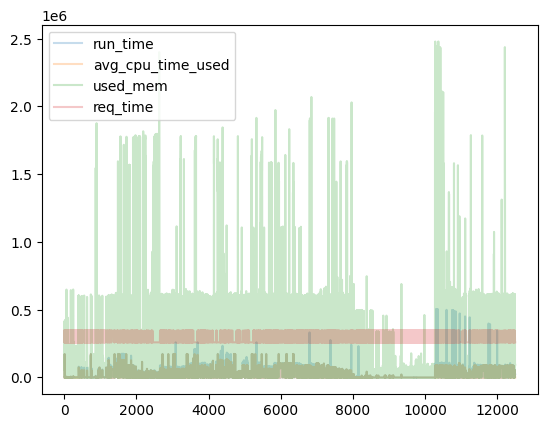

In [18]:
plt.plot(df['run_time'], alpha = 0.25, label = "run_time")
plt.plot(df['avg_cpu_time_used'], alpha = 0.25, label = "avg_cpu_time_used")
plt.plot(df['used_mem'], alpha = 0.25, label = "used_mem")
plt.plot(df['req_time'], alpha = 0.25, label = "req_time")
plt.legend()

In [19]:
for i, value in enumerate(df["avg_cpu_time_used"]):
    if value == -1:
        df["avg_cpu_time_used"][i] = df["avg_cpu_time_used"][i-1]
for i, value in enumerate(df["run_time"]):
    if value == -1:
        df["run_time"][i] = df["run_time"][i-1]
for i, value in enumerate(df["used_mem"]):
    if value == -1:
        df["used_mem"][i] = df["used_mem"][i-1]
for i, value in enumerate(df["req_time"]):
    if value == -1:
        df["req_time"][i] = df["req_time"][i-1]

In [20]:
run_time = df["run_time"]
avg_cpu_time_used = df["avg_cpu_time_used"]
used_mem = df["used_mem"]
req_time = df["req_time"]


run_time = scaler.fit_transform(run_time.values.reshape(-1, 1))
avg_cpu_time_used = scaler.fit_transform(avg_cpu_time_used.values.reshape(-1, 1))
used_mem = scaler.fit_transform(used_mem.values.reshape(-1, 1))
req_time = scaler.fit_transform(req_time.values.reshape(-1, 1))

In [21]:
df = {
    "run_time" : run_time.reshape(-1),
    "avg_cpu_time_used" : avg_cpu_time_used.reshape(-1),
    "used_mem" : used_mem.reshape(-1),
    "req_time" : req_time.reshape(-1),
    "pred_run" : run_time.reshape(-1)
}

In [22]:
df = pd.DataFrame(df)

In [23]:
df

,run_time,avg_cpu_time_used,used_mem,req_time,pred_run
0,0.001238,0.000023,0.024183,1.0,0.001238
1,0.001244,0.000023,0.024207,1.0,0.001244
2,0.001522,0.003371,0.166469,0.0,0.001522
3,0.001236,0.000023,0.024184,1.0,0.001236
4,0.001238,0.000023,0.024178,1.0,0.001238
...,...,...,...,...,...
12495,0.048732,0.000081,0.035024,0.0,0.048732
12496,0.049444,0.000081,0.035081,0.0,0.049444
12497,0.049774,0.000075,0.035053,0.0,0.049774
12498,0.049071,0.000098,0.035020,0.0,0.049071


In [24]:
samples = 20
steps = 1
X = []
Y = []

for i in range(df.shape[0] - samples):
    X.append(df.iloc[i:i+samples, 0:4])
    Y.append(df.iloc[i+samples, 4:])
    
print("Testing data length is: ", len(X[0:1][0]), ': ', X[0:1])
print("Training data length is: ", len(Y[0:1]), ': ', Y[0:1])

Testing data length is:  20 :  [    run_time  avg_cpu_time_used  used_mem  req_time
0   0.001238           0.000023  0.024183       1.0
1   0.001244           0.000023  0.024207       1.0
2   0.001522           0.003371  0.166469       0.0
3   0.001236           0.000023  0.024184       1.0
4   0.001238           0.000023  0.024178       1.0
5   0.001240           0.000023  0.024560       1.0
6   0.002829           0.007038  0.059833       0.0
7   0.001234           0.000023  0.024171       1.0
8   0.001246           0.000023  0.024178       1.0
9   0.001236           0.000023  0.024166       1.0
10  0.342917           0.999514  0.129617       0.0
11  0.001621           0.004077  0.168133       0.0
12  0.002722           0.007367  0.111681       0.0
13  0.001234           0.000023  0.024200       1.0
14  0.001246           0.000023  0.024187       1.0
15  0.000016           0.000017  0.000000       0.0
16  0.001478           0.003655  0.167445       0.0
17  0.002728           0.007009 

In [25]:
X = np.array(X)
Y = np.array(Y)

In [26]:
X, X.shape

(array([[[1.23836678e-03, 2.31310141e-05, 2.41825932e-02, 1.00000000e+00],
         [1.24431094e-03, 2.31310141e-05, 2.42067935e-02, 1.00000000e+00],
         [1.52170510e-03, 3.37134530e-03, 1.66469299e-01, 0.00000000e+00],
         ...,
         [2.72836970e-03, 7.00869726e-03, 7.51501228e-02, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
         [1.98138685e-06, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.24431094e-03, 2.31310141e-05, 2.42067935e-02, 1.00000000e+00],
         [1.52170510e-03, 3.37134530e-03, 1.66469299e-01, 0.00000000e+00],
         [1.23638540e-03, 2.31310141e-05, 2.41842065e-02, 1.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
         [1.98138685e-06, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
         [1.24034817e-03, 2.31310141e-05, 2.85628547e-02, 1.00000000e+00]],
 
        [[1.52170510e-03, 3.37134530e-03, 1.66469299e-01, 0.000000

In [27]:
threshold = round(0.8 * X.shape[0])
print('Threshold is', threshold)

Threshold is 9984


In [28]:
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY = X[threshold:], Y[threshold:]

In [29]:
trainX.shape, trainY.shape

((9984, 20, 4), (9984, 1))

In [30]:
def custom_loss(y_true, y_pred):
            
    return (tf.keras.losses.mean_squared_error(y_true, y_pred) + 1* tf.keras.losses.mean_absolute_error(y_true, y_pred))/2

In [31]:
def make_model():
    model = keras.Sequential()
    model.add(layers.LSTM(50,
                      use_bias=True,
#                          activation = 'relu',
                      input_shape=(trainX.shape[1], trainX.shape[2]),
                      return_sequences = True
                      )) 
    model.add(layers.LSTM(50,
                          use_bias=True,
                         activation = 'relu',
                           return_sequences = True))
    model.add(layers.LSTM(50,
                          use_bias=True,
                         activation = 'relu'))
#                            return_sequences = True))
#     model.add(layers.GRU(20,
#                           activation = 'relu',
#                        use_bias=True))
#    model.add(layers.Dropout(rate = 0.1))
    model.add(layers.Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
#     model.compile(loss=custom_loss, optimizer='adam')
    
    return model

In [32]:
model = make_model()

c:\python\python391\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 20, 50)                │      11,000 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 20, 50)                │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 51,451 (200.98 KB)

 Trainable params: 51,451 (200.98 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle=False,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.1 ,
                    verbose=1)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0280 - val_loss: 8.0561e-04
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0283 - val_loss: 6.6674e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0281 - val_loss: 7.7946e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0276 - val_loss: 8.2780e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0269 - val_loss: 7.9401e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0270 - val_loss: 0.0014
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0271 - val_loss: 4.6518e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0268 - val_loss: 7.2656e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0266 - val_loss: 5.6131e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0266 - val_loss: 6.0691e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0269 - val_loss: 8.0633e-04
Epoch 12/20
36/36 ━━━━━

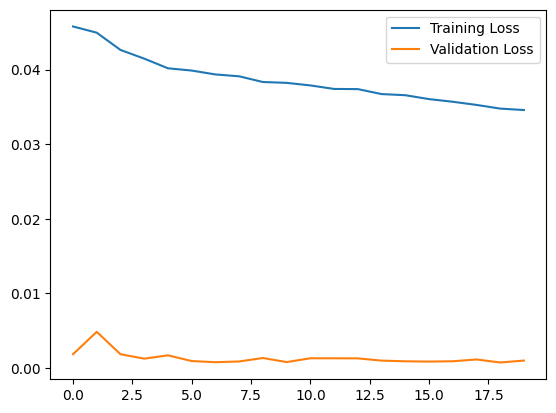

In [46]:
# tr_loss >> val_loss : underfitting
# tr_loss << val_loss : overfitting

plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


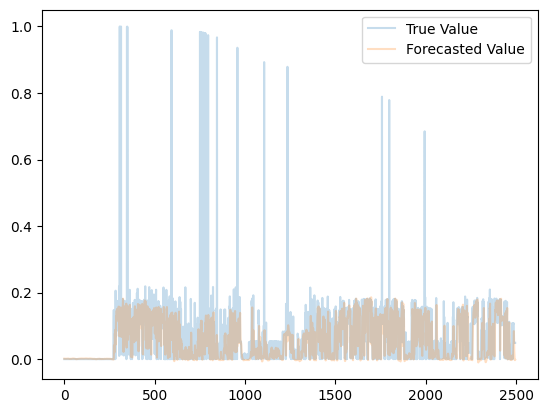

In [47]:
y_pred = model.predict(testX)
plt.plot(testY, alpha = 0.25, label = "True Value")
plt.plot(y_pred, alpha = 0.25, label = "Forecasted Value")
plt.legend()

In [48]:
#y_pred = scaler.fit_transform(y_pred)

In [49]:
#testY = scaler.fit_transform(testY)

In [50]:
rae = 0
for i in range(len(y_pred)):
    abs_val = abs(y_pred[i][0] - testY[i][0])
    rae += abs_val/testY[i][0]

rae = rae / len(y_pred)

In [51]:
rae

0.047222042602854564

In [52]:
rae * 100

4.722204260285457

In [42]:
final_df = pd.DataFrame({
    "testY" : testY.reshape(-1),
    "y_pred" : y_pred.reshape(-1)
})

In [43]:
final_df.corr()

,testY,y_pred
testY,1.00000,0.31144
y_pred,0.31144,1.00000


In [44]:
#model.save('mae_3.0540_gru_model1.keras')

In [54]:
df_ = pd.read_csv("processes_datasets.csv")

In [56]:
df_.columns

Index(['JobID', 'SubmitTime', 'WaitTime', 'RunTime ', 'NProcs',
       'AverageCPUTimeUsed', 'Used Memory', 'ReqNProcs', 'ReqTime: ',
       'ReqMemory', 'Status', 'UserID', 'GroupID', 'ExecutableID', 'QueueID',
       'PartitionID', 'OrigSiteID', 'LastRunSiteID', 'JobStructure',
       'JobStructureParams', 'UsedNetwork', 'UsedLocalDiskSpace',
       'UsedResources', 'ReqPlatform', 'ReqNetwork', 'ReqLocalDiskSpace',
       'ReqResources', 'VOID', 'ProjectID'],
      dtype='object')

In [57]:
df_["Status"].value_counts()

1    336085
5     63129
0      4962
Name: Status, dtype: int64